# Installing required libraries

In [1]:
pip install qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.7 MB/s eta 0:00:00


# Import statements

In [2]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_aer.primitives import Sampler as aer_Sampler

# preparing the quantum circuit for both cases

In [3]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)
# 0th qubit is the case when bob flips the coin while 1st qubit is when bob doesn't flips the coin
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.x(qreg_q[0])
circuit.id(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
print(circuit.draw('text'))

     ┌───┐┌───┐┌───┐┌─┐   
q_0: ┤ H ├┤ X ├┤ H ├┤M├───
     ├───┤├───┤├───┤└╥┘┌─┐
q_1: ┤ H ├┤ I ├┤ H ├─╫─┤M├
     └───┘└───┘└───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1 


# trying on simulator

Counts: {'00': 1024}


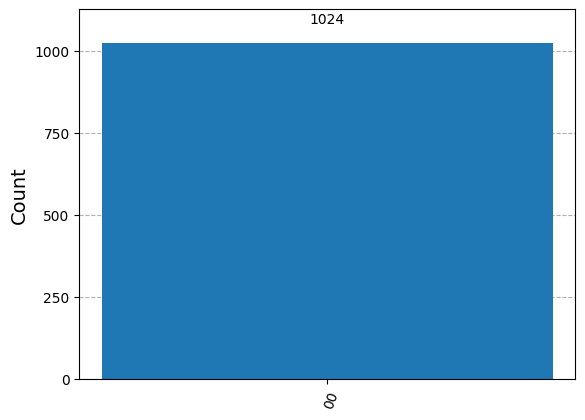

In [4]:
sim_sampler = aer_Sampler()
quasi_dist = sim_sampler.run(circuits = [circuit],shots=1024).result().quasi_dists[0]
counts = {bin(key)[2:].zfill(2): int(value * 1024) for key, value in quasi_dist.items()}
print("Counts:", counts)
plot_histogram(counts)